In [28]:
import json
import matplotlib.pyplot as plt
import re, os
import pandas as pd

os.makedirs("../imgs/", exist_ok=True)

In [29]:
# Load json file
with open("../logs/val_metrics_list.json", 'r') as f:
    raw_lorentz = json.load(f)
with open("../../baselines/LightGCN-PyTorch/logs/val_metrics_LGCN.json", 'r') as f:
    raw_lightgcn = json.load(f)
with open("../../baselines/NGCF/NGCF/val_ngcf.json", 'r') as f:
    raw_ngcf = json.load(f)
with open("../../baselines/hgcf/log-files/val_metrics_hgcf.json", 'r') as f:
    raw_hgcf = json.load(f)
print("-"*40)
print("Data for LorentzGCN")
print(raw_lorentz[:3])
print("-"*40)
print("Data for LightGCN")
print(raw_lightgcn[:3])
print("-"*40)
print("Data for HGCF")
print(raw_hgcf[:3])
print("-"*40)
print("Data for NGCF")
print(list(raw_ngcf.keys())[:2])

----------------------------------------
Data for LorentzGCN
[{'valid Recall@50': 0.04640784586815228, 'valid NDCG@50': 0.015960972218838635}, {'valid Recall@50': 0.058036646935933196, 'valid NDCG@50': 0.020516335311788626}, {'valid Recall@50': 0.06399939066852374, 'valid NDCG@50': 0.022397142135910944}]
----------------------------------------
Data for LightGCN
[{'precision': [4.1782729805013955e-05], 'recall': [0.0014108925255338902], 'ndcg': [0.0004209341158648933]}, {'precision': [0.0015755571030640664], 'recall': [0.0464121982358403], 'ndcg': [0.016093584552952327]}, {'precision': [0.0018454038997214456], 'recall': [0.05458739554317549], 'ndcg': [0.019196206885537564]}]
----------------------------------------
Data for HGCF
[{'recall@50': 0.04539954735376044, 'recall@20': 0.022260184540389968, 'ndcg@50': 0.015295801012655775, 'ndcg@20': 0.010049514001808159}, {'recall@50': 0.059040593082637004, 'recall@20': 0.030016103760445667, 'ndcg@50': 0.020151879604630295, 'ndcg@20': 0.013593

In [30]:
recall_data, ndcg_data = dict(), dict()

In [31]:
recall_data["LorentzGCN"] = [item["valid Recall@50"] for item in raw_lorentz]
recall_data["LightGCN"] = [item["recall"][0] for item in raw_lightgcn]
recall_data["HGCF"] = [item["recall@50"] for item in raw_hgcf]
recall_data["NGCF"] = [_i[0] for _i in raw_ngcf["recall@50"]]

ndcg_data["LorentzGCN"] = [item["valid NDCG@50"] for item in raw_lorentz]
ndcg_data["LightGCN"] = [item["ndcg"][0] for item in raw_lightgcn]
ndcg_data["HGCF"] = [item["ndcg@50"] for item in raw_hgcf]
ndcg_data["NGCF"] = [_i[0] for _i in raw_ngcf["ndcg@50"]]


recall_data["LightGCN"] = recall_data["LightGCN"][:len(recall_data["LightGCN"])//2]
ndcg_data["LightGCN"] = ndcg_data["LightGCN"][:len(ndcg_data["LightGCN"])//2]
colors = {
    "LorentzGCN": "#ff8884",
    "LightGCN": "#2878b5",
    "HGCF": "#A1A9D0",
    "NGCF": "#32B897"
}

colors = {
    "LorentzGCN": "#7eb0d5", #"steelblue", 
    "LightGCN": "#fd7f6f",
    "HGCF": "#ffb55a",
    "NGCF": "#bd7ebe"
}

colors_2 = {
    "LorentzGCN": "#757575",
    "LightGCN": "#ff7f0e",
    "HGCF": "#1f77b4",
    "NGCF": "#2ca02c"
}

In [32]:
lor_gcn_log_path = "../logs/taobao/04_20/lorentz_gcn_21_40_12/train.log"
lor_gcn_rec_list = []
lor_gcn_ndcg_list = []
with open(lor_gcn_log_path, "r") as f:
    lines = f.readlines()
pattern = r"valid metrics: Recall@50: (\d+\.\d+) \| NDCG@50: (\d+\.\d+)"
# Search for the pattern in the text
for line in lines:
    match = re.search(pattern, line)

    # If a match is found, extract the values for Recall@50 and NDCG@50
    if match:
        recall = match.group(1)
        ndcg = match.group(2)
        lor_gcn_rec_list.append(float(recall))
        lor_gcn_ndcg_list.append(float(ndcg))

recall_data["LorentzGCN"] = lor_gcn_rec_list
ndcg_data["LorentzGCN"] = lor_gcn_ndcg_list

In [33]:
for key in recall_data.keys():
    recall_data[key] = [recall_data[key][i] for i in range(len(recall_data[key])) if i%2 == 0]

for key in ndcg_data.keys():
    ndcg_data[key] = [ndcg_data[key][i] for i in range(len(ndcg_data[key])) if i%2 == 0]

for key in recall_data.keys():
    print(f"length for {key} is {len(recall_data[key])}")

epochs = [i*10 for i in range(50)]

length for LorentzGCN is 50
length for LightGCN is 50
length for HGCF is 50
length for NGCF is 50


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


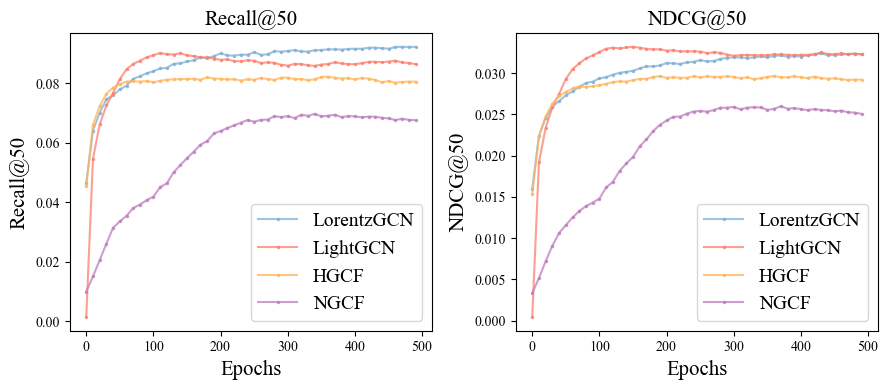

In [34]:
csfont = {'fontname':'Times New Roman'}
tick_size = 10
title_size = 15
marker_size = 3
legend_prop = {
    "family": "Times New Roman",
    "size": 14
}
# csfont = {'fontname':'sans-serif'}
plt.figure(figsize=(9, 4))

plt.subplot(1, 2, 1)
for key in recall_data.keys():
    plt.plot(epochs, recall_data[key], label=key, marker='.', markersize=marker_size, c=colors[key], alpha=0.75)

plt.title("Recall@50", **csfont, size=title_size)
plt.xlabel("Epochs", **csfont, size=title_size)
plt.ylabel("Recall@50", **csfont, size=title_size)
plt.xticks(**csfont, size=tick_size)
plt.yticks(**csfont, size=tick_size)
plt.legend(prop = legend_prop)

plt.subplot(1, 2, 2)
for key in ndcg_data.keys():
    plt.plot(epochs, ndcg_data[key], label=key, marker='.', markersize=marker_size, c=colors[key], alpha=0.75)

plt.title("NDCG@50", **csfont, size=title_size)
plt.xlabel("Epochs", **csfont, size=title_size)
plt.ylabel("NDCG@50", **csfont, size=title_size)
plt.xticks(**csfont, size=tick_size)
plt.yticks(**csfont, size=tick_size)
plt.legend(prop = legend_prop)
plt.tight_layout()
plt.savefig("../imgs/rec_ndcg_curves.eps")
plt.savefig("../imgs/curves_diff_samples.png", dpi=1000)
plt.show()

In [35]:
pd_num_neg_samp = pd.read_excel("../logs/Num_negatives.xlsx")
pd_num_neg_samp.head()

,Epoch,Train Loss_1,Train Loss_2,Train Loss_3
0,1,26.063955,20.856798,17.901817
1,2,24.177410,18.890542,16.017979
2,3,20.895711,16.312653,14.164616
3,4,17.144693,12.998133,11.770244
4,5,14.988050,10.638085,9.380009


In [36]:
x_epoch = list(pd_num_neg_samp["Epoch"])
loss_list = [
    list(pd_num_neg_samp["Train Loss_1"]),
    list(pd_num_neg_samp["Train Loss_2"]),
    list(pd_num_neg_samp["Train Loss_3"]),
]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


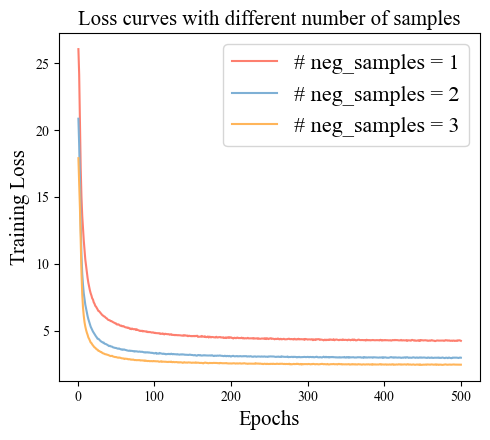

In [37]:
loss_colors = ["#fd7f6f", "#7eb0d5", "#ffb55a"]
loss_colors_2 = list(colors_2.values())
plt.figure(figsize=(5, 4.5))
plt.title("Loss curves with different number of samples", **csfont, size=title_size)
for i in range(len(loss_list)):
    plt.plot(x_epoch, loss_list[i], label=f"# neg_samples = {i+1}", color=loss_colors[i])

plt.legend(prop={
    "family": "Times New Roman",
    "size": 16
})
plt.xlabel("Epochs", **csfont, size=title_size)
plt.ylabel("Training Loss", **csfont, size=title_size)
plt.xticks(**csfont, size=tick_size)
plt.yticks(**csfont, size=tick_size)
plt.tight_layout()
plt.savefig("../imgs/loss_neg_sample.eps")
plt.show()

In [38]:
# Number of neg samples
df_loss = pd.read_csv("../logs/loss-num.csv")
df_recall = pd.read_csv("../logs/recall-num.csv")
df_ndcg = pd.read_csv("../logs/ndcg-num.csv") 
df_loss.head()

,Step,num3,num2,num1
0,0,16.789509,19.764966,25.112118
1,1,12.893834,15.561409,20.533492
2,2,9.297812,11.053574,15.188375
3,3,6.710085,8.166159,12.223916
4,4,5.342230,6.715579,10.551803


In [39]:
loss_list = [list(df_loss[f"num{i}"]) for i in range(1, 4)]
recall_list = [list(df_recall[f"num{i}"]) for i in range(1, 4)]
ndcg_list = [list(df_ndcg[f"num{i}"]) for i in range(1, 4)]
data_dict = {
    "Loss": loss_list,
    "Recall@50": recall_list,
    "NDCG@50": ndcg_list
}
x_epochs = list(df_loss["Step"])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


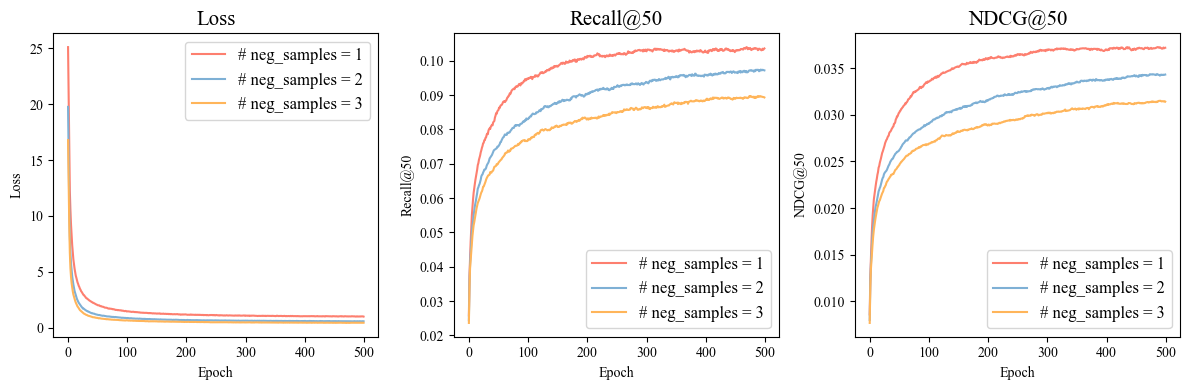

In [40]:
plt.figure(figsize=(12, 4))
# plt.suptitle("Results with different number of negative samples", **csfont, size=title_size)
for i, key in enumerate(data_dict.keys()):
    plt.subplot(1, 3, i+1)
    plt.title(key, **csfont, size=title_size)
    for j in range(3):
        plt.plot(x_epochs, data_dict[key][j], color=loss_colors[j], label=f"# neg_samples = {j+1}")
        
    plt.xlabel("Epoch", **csfont)
    plt.ylabel(key, **csfont)
    plt.xticks(**csfont, size=tick_size)
    plt.yticks(**csfont, size=tick_size)
    plt.legend(prop={
        "family": "Times New Roman",
        "size": 12
    })
plt.tight_layout()
plt.savefig("../imgs/curves_diff_samples.eps")
plt.savefig("../imgs/curves_diff_samples.png", dpi=1000)
plt.show()